# Welcome to SmartInvestment.com 
Our company sells investment funds tailored to maximise results and minimise risk. Our star fund is called FAANG+_forever.

### About FAANG+_forever
If we take a look into the market data of each one of these we can find out how well we are performaing. Stocks included are from META, NFLX, APPL, TSLA, GOOGL, AAMZ.

In [2]:
#Importing packages
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Importing dataframes
df_appl = pd.concat([pd.read_csv('market_data/AAPL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AAPL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_amzn = pd.concat([pd.read_csv('market_data/AMZN_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AMZN_1.csv', parse_dates=['Date'])], ignore_index=True)
df_googl = pd.concat([pd.read_csv('market_data/GOOGL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/GOOGL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_meta = pd.concat([pd.read_csv('market_data/META_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/META_1.csv', parse_dates=['Date'])], ignore_index=True)
df_nflx = pd.concat([pd.read_csv('market_data/NFLX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/NFLX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_spx = pd.concat([pd.read_csv('market_data/SPX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/SPX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_tsla = pd.concat([pd.read_csv('market_data/TSLA_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/TSLA_1.csv', parse_dates=['Date'])], ignore_index=True)

#Parsing dates
df_appl['Date'] = pd.to_datetime(df_appl['Date'], utc=True).dt.date
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], utc=True).dt.date
df_googl['Date'] = pd.to_datetime(df_googl['Date'], utc=True).dt.date
df_meta['Date'] = pd.to_datetime(df_meta['Date'], utc=True).dt.date
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], utc=True).dt.date
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'], utc=True).dt.date

df_spx['Date'] = pd.to_datetime(df_spx['Date'], utc=True).dt.date
df_spx['Date'] = pd.to_datetime(df_spx['Date'], format = '%Y%m')

#### Time to find some insights...
We need to provide to our investors a quarter by quarter report with the performance of the fund comparing it with the performance of the SPX500. Let's take a look at our datasets.

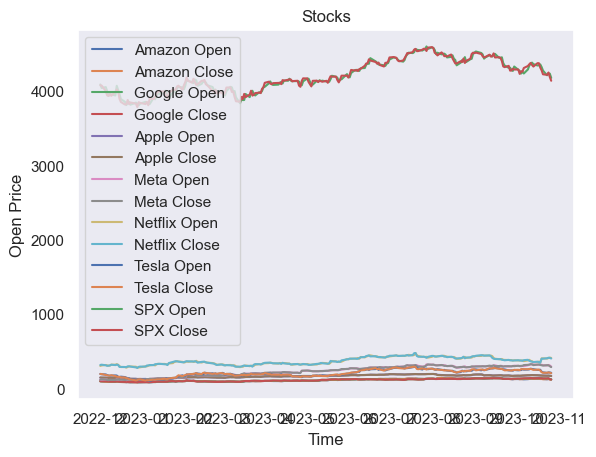

In [4]:
sns.set(style="dark")
sns.lineplot(x='Date', y='Open', data=df_amzn, label='Amazon Open')
sns.lineplot(x='Date', y='Close', data=df_amzn, label='Amazon Close')
sns.lineplot(x='Date', y='Open', data=df_googl, label='Google Open')
sns.lineplot(x='Date', y='Close', data=df_googl, label='Google Close')
sns.lineplot(x='Date', y='Open', data=df_appl, label='Apple Open')
sns.lineplot(x='Date', y='Close', data=df_appl, label='Apple Close')
sns.lineplot(x='Date', y='Open', data=df_meta, label='Meta Open')
sns.lineplot(x='Date', y='Close', data=df_meta, label='Meta Close')
sns.lineplot(x='Date', y='Open', data=df_nflx, label='Netflix Open')
sns.lineplot(x='Date', y='Close', data=df_nflx, label='Netflix Close')
sns.lineplot(x='Date', y='Open', data=df_tsla, label='Tesla Open')
sns.lineplot(x='Date', y='Close', data=df_tsla, label='Tesla Close')
sns.lineplot(x='Date', y='Open', data=df_spx, label='SPX Open')
sns.lineplot(x='Date', y='Close', data=df_spx, label='SPX Close')
plt.title('Stocks')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

As the data is incomplete, we will remove data from first and last week. Considering 2022-12-01 is week 48 of 2022 and 2023-10-26 is week 43 of 2023.


In [5]:
print("SPX First Date:", df_spx['Date'].min(), "SPX Last Date:", df_spx['Date'].max())
print("Apple First Date:", df_appl['Date'].min(), "Google Last Date:", df_appl['Date'].max())
print("Amazon First Date:", df_amzn['Date'].min(), "Google Last Date:", df_amzn['Date'].max())
print("Google First Date:", df_googl['Date'].min(), "Google Last Date:", df_googl['Date'].max())
print("Meta First Date:", df_meta['Date'].min(), "Google Last Date:", df_meta['Date'].max())
print("Netflix First Date:", df_nflx['Date'].min(), "Google Last Date:", df_nflx['Date'].max())
print("Tesla First Date:", df_tsla['Date'].min(), "Google Last Date:", df_tsla['Date'].max())

SPX First Date: 2022-12-01 00:00:00 SPX Last Date: 2023-10-26 00:00:00
Apple First Date: 2022-12-01 Google Last Date: 2023-10-26
Amazon First Date: 2022-12-01 Google Last Date: 2023-10-26
Google First Date: 2022-12-01 Google Last Date: 2023-10-26
Meta First Date: 2022-12-01 Google Last Date: 2023-10-26
Netflix First Date: 2022-12-01 Google Last Date: 2023-10-26
Tesla First Date: 2022-12-01 Google Last Date: 2023-10-26


In [16]:
print("SPX First Week:", df_spx['Date'].min().isocalendar().week, "SPX Last Week:", df_spx['Date'].max().isocalendar().week)
df_spx['WeekNumber'] = pd.to_datetime(df_spx['Date']).dt.isocalendar().week
filtered_df = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].min().isocalendar().week) & (df_spx['Date'].dt.year == 2022))]
filtered_df = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].max().isocalendar().week) & (df_spx['Date'].dt.year == 2023))]
filtered_df.head(5)

SPX First Week: 48 SPX Last Week: 43


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,WeekNumber
0,2022-12-01,4087.139893,4100.509766,4050.870117,4076.570068,4527130000,0.0,0.0,48
1,2022-12-02,4040.169922,4080.479980,4026.629883,4071.699951,4012620000,0.0,0.0,48
2,2022-12-05,4052.020020,4052.449951,3984.489990,3998.840088,4280820000,0.0,0.0,49
3,2022-12-06,3996.629883,4001.510010,3918.389893,3941.260010,4368380000,0.0,0.0,49
4,2022-12-07,3933.280029,3957.570068,3922.679932,3933.919922,4118050000,0.0,0.0,49
